# Projet 1 Finance
## Deuxième partie de nettoyage
On a finit la première partie du nettoyage des données dans le fichier précédent.  
On va maintenant explorer les features que nous avons choisit de conserver dans le fichier Train.

- Exploration statistique
- Séparation du dataset par les catégories de target
- Choix des variables pour le modèle
- Corrélation
- Equilibrage
- Normalisation

In [2]:
# import des librairies
# Base
import csv
import pandas as pd
import numpy as np

# Dataviz
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno

# Seed
import random
random.seed(5)

In [3]:
train = pd.read_csv("./train_clean.csv")
train.head()

,Unnamed: 0,CustomerId,TransactionStartTime,Value,Amount,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,PayBackId,IsThirdPartyConfirmed,IsDefaulted,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
0,15,CustomerId_233,10/22/2018 16:04,5000.0,-5000.0,10/22/2018 16:04,5375.0,10/30/2018 6:49,1.0,11/21/2018 16:03,PayBackId_1719,0.0,0.0,1,0,0,0,0,0,0
1,17,CustomerId_305,10/23/2018 13:12,500.0,-500.0,10/23/2018 13:12,543.0,10/23/2018 13:18,1.0,11/22/2018 13:12,PayBackId_725,0.0,0.0,1,0,0,0,0,0,0
2,18,CustomerId_27,10/23/2018 15:20,1000.0,-1000.0,10/23/2018 15:20,1085.0,10/23/2018 15:26,1.0,11/22/2018 15:20,PayBackId_1085,0.0,0.0,1,0,0,0,0,0,0
3,19,CustomerId_27,10/23/2018 15:31,500.0,-500.0,10/24/2018 6:34,543.0,10/24/2018 6:38,1.0,11/23/2018 6:33,PayBackId_763,0.0,0.0,1,0,0,0,0,0,0
4,20,CustomerId_27,10/24/2018 6:56,500.0,-500.0,10/24/2018 6:56,543.0,10/24/2018 7:01,1.0,11/23/2018 6:55,PayBackId_1228,0.0,0.0,0,1,0,0,0,0,0


In [4]:
train.describe()

,Unnamed: 0,Value,Amount,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
count,1476.000000,1.476000e+03,1.476000e+03,1.476000e+03,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000
mean,1052.308943,5.224964e+04,-5.213873e+04,1.165445e+04,0.729675,0.985772,0.119241,0.621274,0.119919,0.002033,0.003388,0.159214,0.035908,0.058266
std,607.495803,1.676527e+05,1.676663e+05,7.677083e+04,0.444278,0.118468,0.324182,0.485234,0.324977,0.045053,0.058124,0.366000,0.186123,0.234324
min,15.000000,1.000000e+02,-2.500000e+06,5.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,530.750000,1.000000e+03,-1.200000e+04,1.115000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1011.500000,4.720000e+03,-4.250000e+03,2.800000e+03,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1615.250000,1.200000e+04,-1.000000e+03,1.050000e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2099.000000,2.500000e+06,-1.000000e+02,2.760000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.columns

Index(['Unnamed: 0', 'CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'IssuedDateLoan', 'AmountLoan', 'PaidOnDate', 'IsFinalPayBack',
       'DueDate', 'PayBackId', 'IsThirdPartyConfirmed', 'IsDefaulted',
       'ProductCategory_airtime', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_retail', 'ProductCategory_tv',
       'ProductCategory_utility_bill'],
      dtype='object')

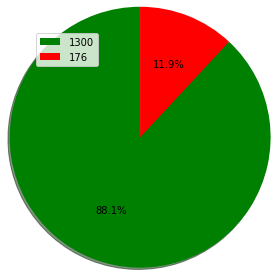

In [8]:
# Répartition payeurs OK et payeurs DEFAULT, en pourcentage sur un camenbert
plt.pie(x=train['IsDefaulted'].value_counts(), autopct="%1.1f%%", shadow=True,
        startangle=90, radius=1.5, colors = ['Green', 'Red'])
plt.legend(labels=train['IsDefaulted'].value_counts())
plt.show()

In [ ]:
# On visualise nos différentes corrélation possible
sns.pairplot(train, hue = 'Outcome', palette = ('Green', 'Red'))

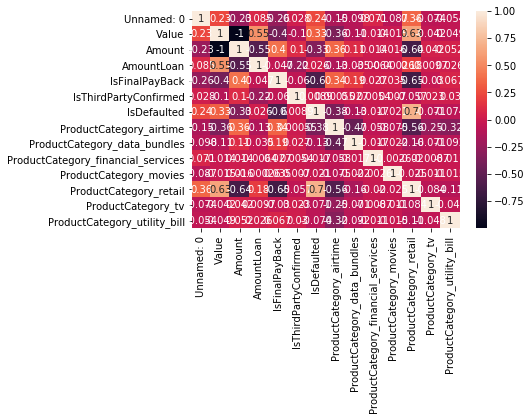

In [6]:
sns.heatmap(train.corr(), annot=True)